# BUSINESS PROBLEM

# Analysis Fraud Company

Check Financial fraud transations.

# What is the business model?

Analysis Fraud Company is a company specialized in the detection of fraud in financial transactions made through mobile devices. The company has a service called "Blocker Fraud" which guarantees the blocking of fraudulent transactions.

# What is the business problem the company is facing?

Analysis Fraud Company is expanding and try to reach new customers as soon as possible, it has adopted a very aggressive strategy. The strategy works as follows:

The company will receive 25% of each transaction value that was correctly detected as fraud.

The company will receive 5% of each transaction value that was detected as a fraud despite being legitimate.

The company will return 100% of each transaction value that was detected as legitimate despite being a fraud.

In other words, the company takes the risk of failing to detect fraud and earns money when correctly detecting fraud.

For the client, it is an excellent deal to hire Blocker Fraud Company. Although the fee charged is very high when fraud is correctly detected (25%), the hiring company reduces its costs of detecting fraudulent transactions and errors in the anti-fraud service are under the hired company responsibility.

For the Analysis of Fraud company, it will attract many customers with the guaranteed return in the event of a failure to detect customer fraud. Besides, Analysis of Fraud only depends on the precision and accuracy of its model: the more accurate the prediction, the higher the company's revenue. However, in the case of low accuracy, the company could have a high loss.

# PROBLEM UNDERSTANDING

What is the business solution that this project has to deliver? As a data science consultant, you have to create a highly precise and accurate model for detecting fraud in mobile transactions.

At the end of your consultancy, you need to provide the CEO of Analysis Fraud Company a model in production that will be accessed via API, meaning that clients will send their transactions via API for your model to classify as fraudulent or legitimate.

In addition, you will need to submit a report with the model's performance and results about the profit and loss that the company will make using the model you created. Your report should contain the answers to the following questions:

   * What is the precision and accuracy of the model?
   
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   
   * What is the expected loss by the company for the cases where the model fails to detect fraud?
   
   * What is the expected profit for the Analysis Fraud Company if it uses the model for all mobile transactions?


Source data set: https://www.kaggle.com/ntnu-testimon/paysim1

| Feature        | Description                                                                                                                                                                                                                                                                                           |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| step           | maps a unit of time in the real world\. In this case 1 step is 1 hour of time\. Total steps 744 \(30 days simulation\)\.                                                                                                                                                                              |
| type           | Transaction type \(CASH\-IN, CASH\-OUT, DEBIT, PAYMENT and TRANSFER\)                                                                                                                                                                                                                                 |
| amount         | amount of the transaction in local currency                                                                                                                                                                                                                                                           |
| nameOrig       | customer who started the transaction                                                                                                                                                                                                                                                                  |
| oldbalanceOrg  | initial balance before the transaction                                                                                                                                                                                                                                                                |
| newbalanceOrig | new balance after the transaction                                                                                                                                                                                                                                                                     |
| nameDest       | customer who is the recipient of the transaction                                                                                                                                                                                                                                                      |
| oldbalanceDest | initial balance recipient before the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                   |
| newbalanceDest | new balance recipient after the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                        |
| isFraud        | This is the transactions made by the fraudulent agents inside the simulation\. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system |
| isFlaggedFraud | The business model aims to control massive transfers from one account to another and flags illegal attempts\. An illegal attempt in this dataset is an attempt to transfer more than 200K in a single transaction 

## IOT Method Solution Strategy

In [1]:
cd ..

/home/ehgeraldo/repos/Fraud_Detection


In [2]:
cd images

/home/ehgeraldo/repos/Fraud_Detection/images


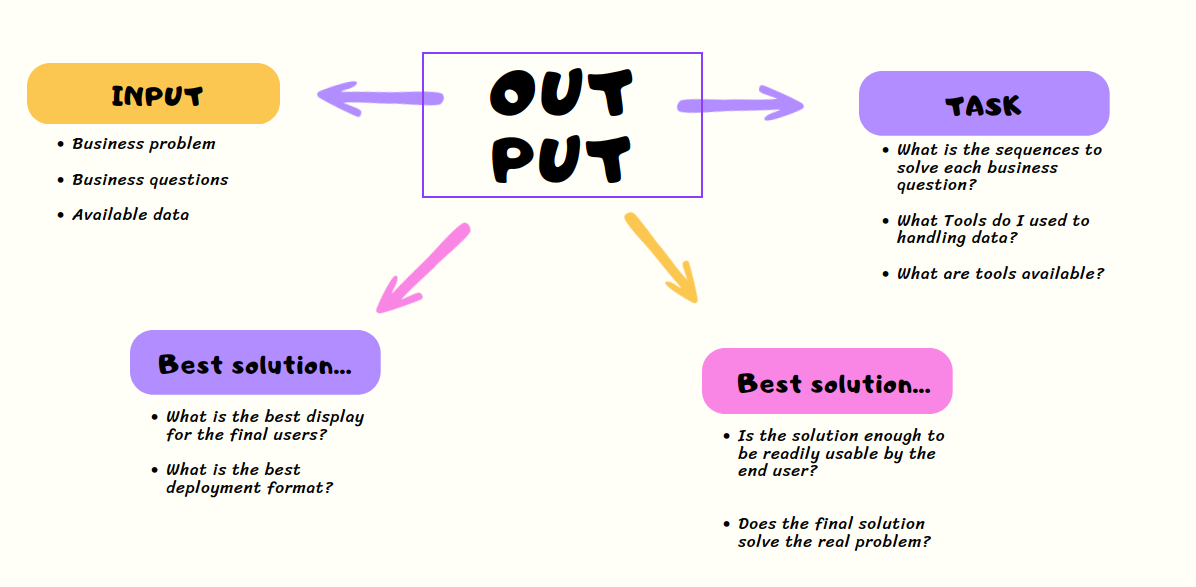

In [3]:
from IPython.display       import Image
Image( 'IOT_Method_Solution.png', width=1000 )

# SOLUTION STRATEGY


### INPUT

   * Business problem: correctly detect fraudulent transactions.
   * Business questions: described in the preceding section
   * Available data: dataset with information from mobile transactions.
        
        
### OUTPUT

   * An API to classify clients transactions.
   * A dashboard with reporting information about the following business questions:

   * What is the precision and accuracy of the model?
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   * What is the expected loss by the company for the cases where the model fails to detect fraud
   * What is the expected profit for the Blocker Fraud Company if it uses the model for all mobile transactions?
    

### TASKs
Create an API to classify clients transactions.

   * Create a machine learning classification model
   * Create an API to respond to clients requests
   * Host API on a cloud service

# PROJECT SOLUTION CYCLE

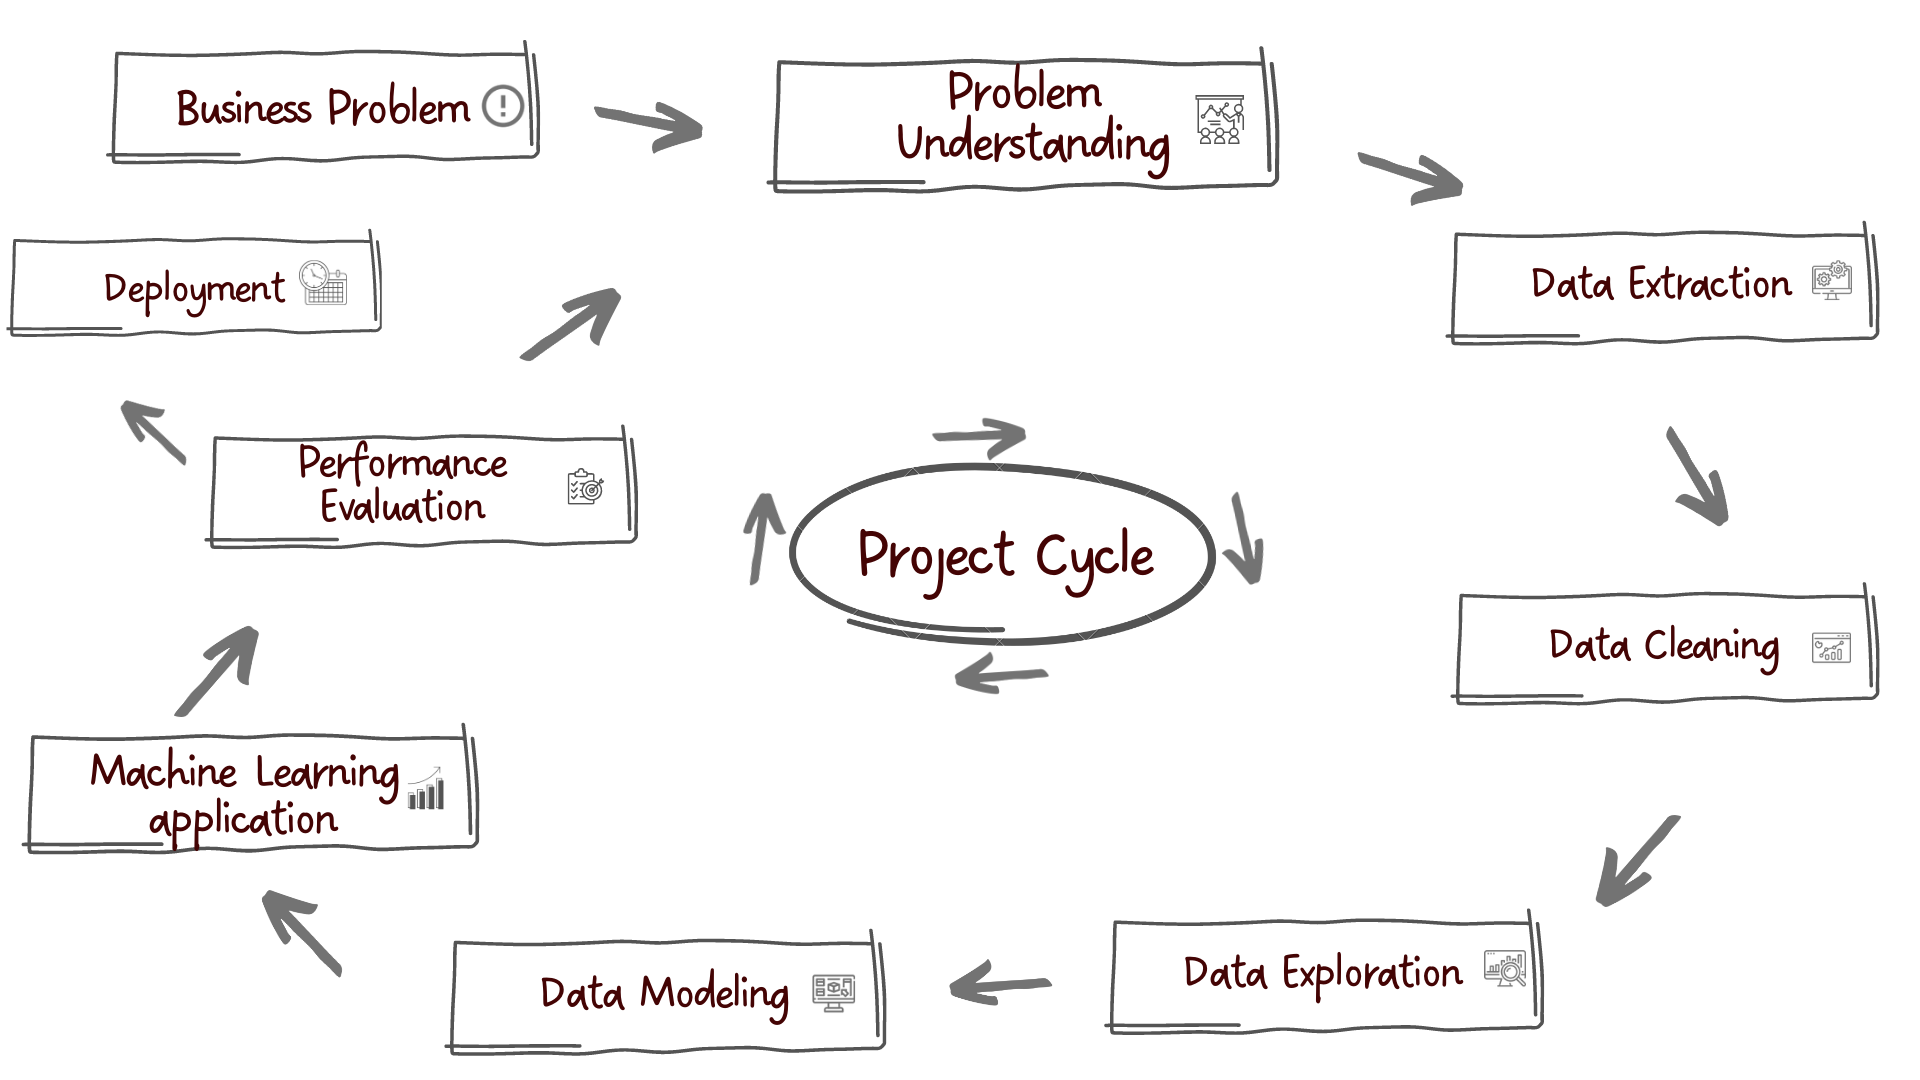

In [4]:
from IPython.display       import Image
Image( 'Project_Cicles.png', width=1000 )

# HYPOTHESIS MIND MAP

In [5]:
pwd

'/home/ehgeraldo/repos/Fraud_Detection/images'

In [6]:
ls -l

total 560
-rw-rw-r-- 1 ehgeraldo ehgeraldo  93840 jun 15 23:12 Feature_Description.png
-rw-rw-r-- 1 ehgeraldo ehgeraldo 141563 jun  5 20:26 Hypothesis_Map.png
-rw-rw-r-- 1 ehgeraldo ehgeraldo 115818 jun  1 23:19 IOT_Method_Solution.png
-rw-rw-r-- 1 ehgeraldo ehgeraldo 215310 jun  3 10:59 Project_Cicles.png


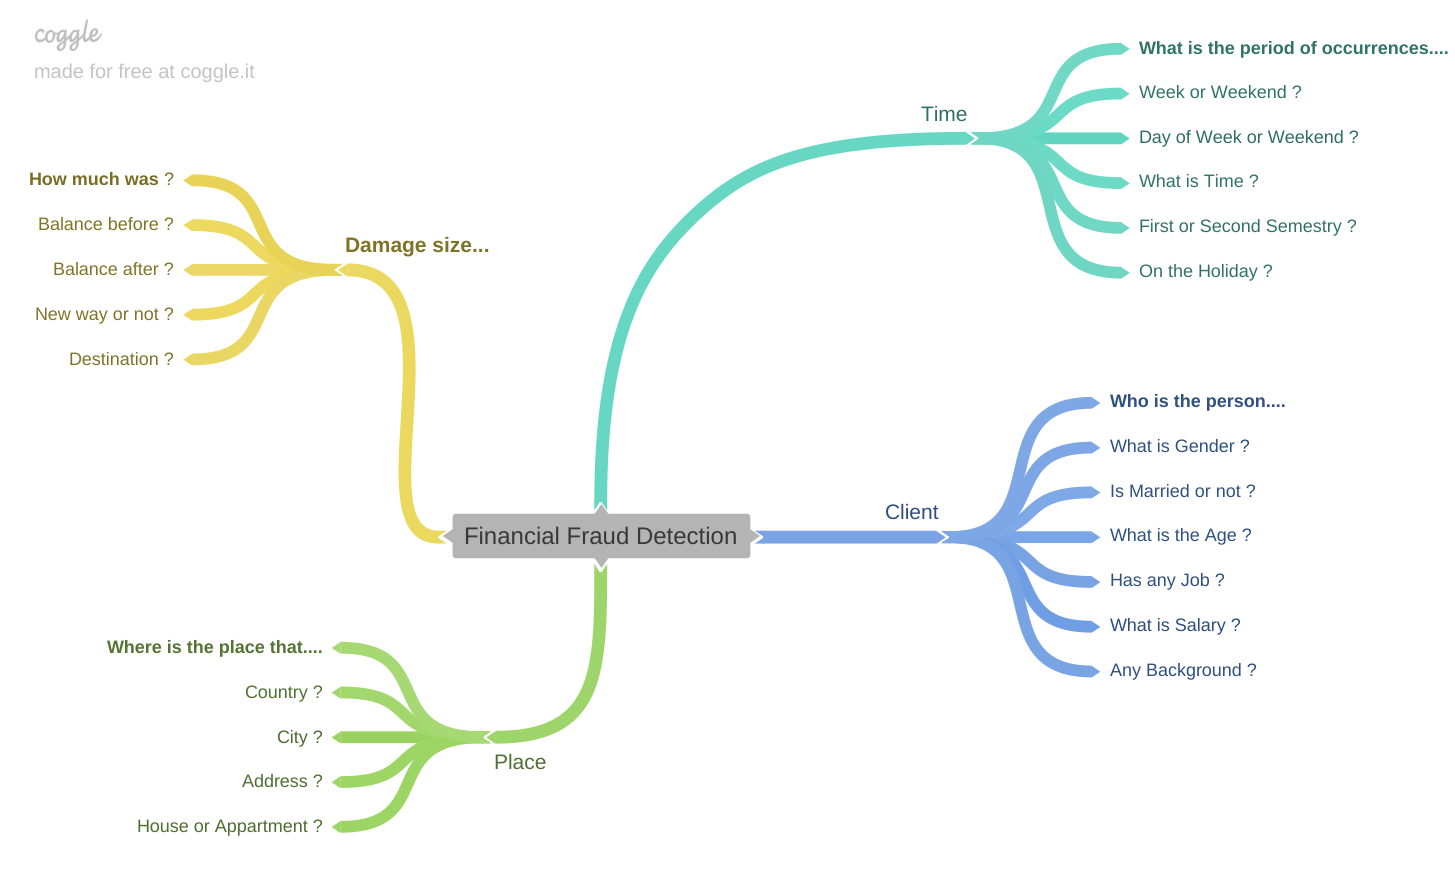

In [7]:
from IPython.display       import Image
Image( 'Hypothesis_Map.png', width=1000 )

# 0.0 Imports

In [8]:
# data manipulation
import pandas  as  pd
import numpy   as  np

# EDA
import seaborn as  sns
import math

# utilities
import inflection
from IPython.core.display import HTML
from IPython.display      import Image

# plots
import plotly.graph_objects        as go
import plotly.express              as px

# PySpark for data manipulation
from   plotly.subplots             import make_subplots
from   pyspark.sql                 import SparkSession
from   pyspark.ml.classification   import LogisticRegression
from   pyspark.ml.feature          import VectorAssembler
from   pyspark.ml.evaluation       import MultilabelClassificationEvaluator
from   pyspark.sql.types           import StructType, StructField
from   pyspark.sql.types           import StringType, ShortType, ByteType, DoubleType, DecimalType
from   pyspark.sql.functions       import col, when, abs, lit
from   pyspark.ml.feature          import RobustScaler, RobustScalerModel
from   pyspark.ml.feature          import StandardScaler, StandardScalerModel
from   pyspark.ml.feature          import MinMaxScaler, MinMaxScalerModel
from   pyspark.ml.feature          import UnivariateFeatureSelector
from   pyspark.ml.stat             import ChiSquareTest
from   pyspark.ml.classification   import RandomForestClassifier
from   pyspark.ml.classification   import GBTClassifier, GBTClassificationModel
from   pyspark.sql                 import functions                               as F

# Helper Function

In [9]:
# +++++++++
# Graphic
# +++++++++
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()


# ++++++++++++
# Data Types
# ++++++++++++
def check_dataframe( dataframe, sample_size = 3 ):
    '''
    Print number of NAs, percentage of NA to the given column,
    number of unique values, data types, dataframe shape and 
    return a random sample of dataframe'''
    
    # create dictionary with descriptive information
    dict_data = {'Num NAs':     dataframe.isna().sum(),
                 'Percent NAs': dataframe.isna().mean(),
                 'Num unique':  dataframe.nunique(),
                 'Data Type':   dataframe.dtypes }
  
    # print descriptive data
    print( pd.DataFrame( dict_data ), '\n' )
    # print dataframe shape
    print( f'Dataframe shape is {dataframe.shape}', '\n' )  
    
    
    return dataframe.sample( sample_size )


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
%%html
<style>
div.output_area pre {
    white-space: pre;
}
</style>

# Loading Data

In [11]:
cd ..

/home/ehgeraldo/repos/Fraud_Detection


In [12]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Fraud_Detection/data/synth_composite.csv', low_memory=False)

In [13]:
df_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data Description

In [14]:
df1 = df_raw.copy()

# Data dimensions

In [15]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 6362620
Number of Columns: 11


# Rename Columns

In [16]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
cols_old = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']

snakecase = lambda x: inflection.underscore(x)

cols_news = list(map(snakecase, cols_old))

df1.columns = cols_news

In [18]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data types

In [19]:
check_dataframe( df1 )

                  Num NAs  Percent NAs  Num unique Data Type
step                    0          0.0         743     int64
type                    0          0.0           5    object
amount                  0          0.0     6362038   float64
name_orig               0          0.0     6353335    object
oldbalance_org          0          0.0     6362547   float64
newbalance_orig         0          0.0     2275917   float64
name_dest               0          0.0     2727854    object
oldbalance_dest         0          0.0     6362620   float64
newbalance_dest         0          0.0     6362620   float64
is_fraud                0          0.0           2     int64
is_flagged_fraud        0          0.0           2     int64 

Dataframe shape is (6362620, 11) 



,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
3952200,335,CASH_OUT,17707.375994,160_4766856_0,680.049285,0.000000,160_289824_0,110288.694537,127785.727324,0,0
54734,550,PAYMENT,1827.811938,160_6149006_0,154724.408092,152896.596154,160_2632169_0,0.508041,15.318715,0,0
3505053,256,PAYMENT,6946.896684,160_3425106_0,128906.202787,121959.306103,160_1460527_0,5.890810,7.752030,0,0


# Descriptive Statistical

In [20]:
num_attributes = df1.select_dtypes( include=['int64','float64'] )

# Numerical Attributes

In [21]:
# Central Tendency - mean, median  
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
    
# Dispersion - standard deviation (std), min, max, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
    
# Dispersion - values' Range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
    
# Dispersion - skew and kurtosis
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T
    
# Concatenate all data frames
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,step,1.000000,7.430000e+02,7.420000e+02,2.390056e+02,235.000000,1.416541e+02,0.381673,0.318190
1,amount,-7.000000,9.244538e+07,9.244539e+07,1.798555e+05,74868.834525,6.038686e+05,30.993157,1797.846073
2,oldbalance_org,-95.000000,5.958502e+07,5.958512e+07,8.338976e+05,14206.578469,2.888443e+06,5.250112,32.985998
3,newbalance_orig,-109.000000,4.958503e+07,4.958514e+07,7.930853e+05,0.000000,2.853683e+06,5.318931,33.753316
4,oldbalance_dest,0.000008,3.560159e+08,3.560159e+08,1.100708e+06,132704.435413,3.399178e+06,19.921786,948.675971
5,newbalance_dest,0.000013,3.561793e+08,3.561793e+08,1.225002e+06,214661.656396,3.674127e+06,19.352323,862.157808
6,is_fraud,0.000000,1.000000e+00,1.000000e+00,1.290820e-03,0.000000,3.590479e-02,27.779538,769.702982
7,is_flagged_fraud,0.000000,1.000000e+00,1.000000e+00,2.200351e-06,0.000000,1.483357e-03,674.143955,454468.214285


In [22]:
df1.sample(3)

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
4557403,249,CASH_OUT,87076.339128,160_3192025_0,2.986663e+04,0.000000e+00,160_664148_0,1.462815e+06,1.549876e+06,0,0
595192,19,CASH_OUT,127101.474201,160_459395_0,1.322758e+04,0.000000e+00,160_7597_0,2.565696e+05,1.248361e+06,0,0
2042602,514,CASH_IN,47720.520443,160_6059749_0,9.388241e+06,9.340520e+06,160_2442899_0,2.304331e+05,1.824767e+05,0,0


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalance_org'}>],
       [<AxesSubplot:title={'center':'newbalance_orig'}>,
        <AxesSubplot:title={'center':'oldbalance_dest'}>,
        <AxesSubplot:title={'center':'newbalance_dest'}>],
       [<AxesSubplot:title={'center':'is_fraud'}>,
        <AxesSubplot:title={'center':'is_flagged_fraud'}>,
        <AxesSubplot:>]], dtype=object)

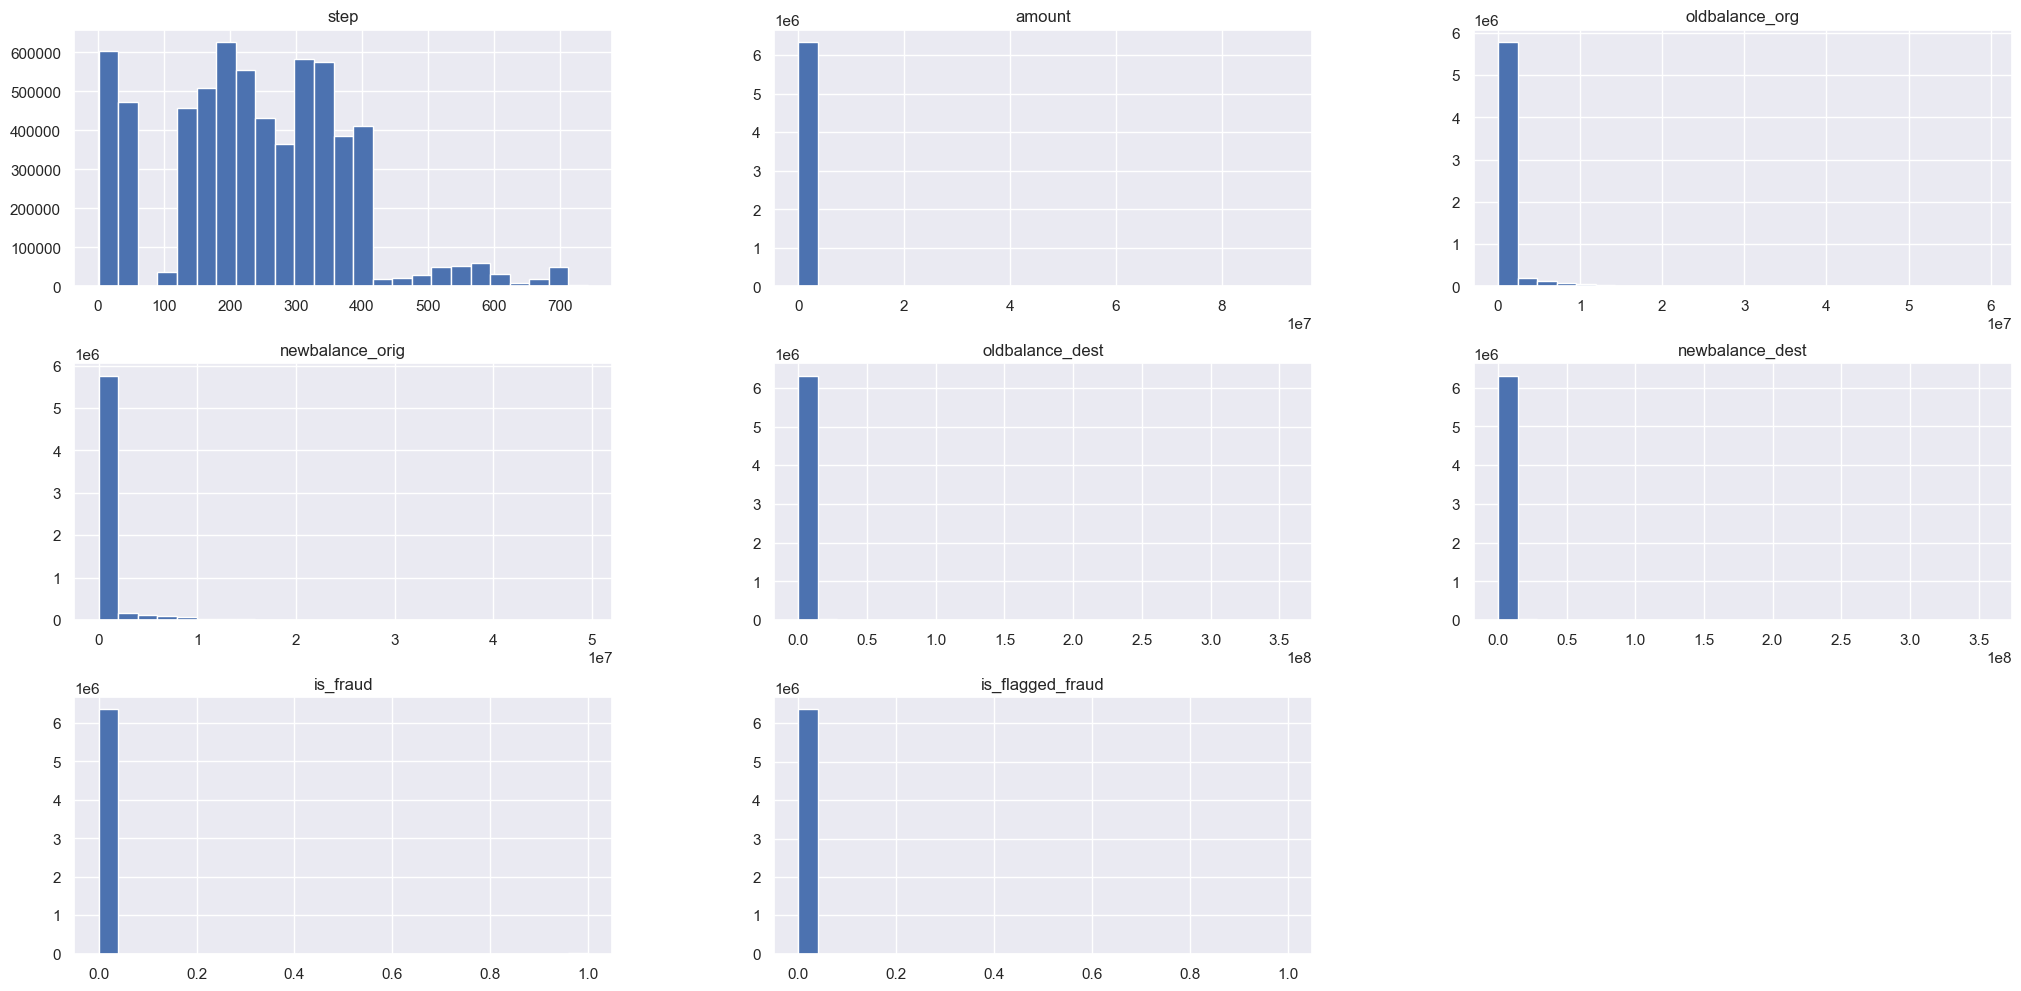

In [23]:
num_attributes.hist(bins=25)

### There are 6 million instances in the dataset. PySpark will be utilized to handle this large volume of data.

### New Data Description after initialize PySpark

In [24]:
# create Spark session
ss = SparkSession.builder \
    .master("local[*]") \
    .appName("fraud_detection") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

23/06/19 17:01:59 WARN Utils: Your hostname, Ubuntu resolves to a loopback address: 127.0.1.1; using 192.168.0.88 instead (on interface enp1s0)
23/06/19 17:01:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/19 17:02:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [25]:
# define data schema
fraud_data_schema = StructType([
    StructField('step',             ShortType(),  True),
    StructField('type',             StringType(), True),
    StructField('amount',           DoubleType(), True),
    StructField('nameOrig',         StringType(), True),
    StructField('oldbalanceOrg',    DoubleType(), True),
    StructField('newbalanceOrig',   DoubleType(), True),
    StructField('namedest',         StringType(), True),
    StructField('oldbalanceDest',   DoubleType(), True),
    StructField('newbalanceDest',   DoubleType(), True),
    StructField('isFraud',          ByteType(),   True),
    StructField('isFlaggedFraud',   ByteType(),   True),
    
])

# load data from .csv
df_fraud_spark = ss.read.csv( path = '/home/ehgeraldo/repos/Fraud_Detection/data/synth_composite.csv', schema = fraud_data_schema, header = True )

In [26]:
# Check new schema

df_fraud_spark.printSchema()

root
 |-- step: short (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- nameOrig: string (nullable = true)
 |-- oldbalanceOrg: double (nullable = true)
 |-- newbalanceOrig: double (nullable = true)
 |-- namedest: string (nullable = true)
 |-- oldbalanceDest: double (nullable = true)
 |-- newbalanceDest: double (nullable = true)
 |-- isFraud: byte (nullable = true)
 |-- isFlaggedFraud: byte (nullable = true)



In [27]:
# Display data

df_fraud_spark.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+-------+--------------+
|step|    type|            amount|     nameOrig|     oldbalanceOrg|    newbalanceOrig|     namedest|    oldbalanceDest|    newbalanceDest|isFraud|isFlaggedFraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+-------+--------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|      0|             0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|      0|             0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|      0|             0|
+----+--------+-------------

In [28]:
# Column names

[print( column ) for column in df_fraud_spark.columns]

step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
namedest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


[None, None, None, None, None, None, None, None, None, None, None]

In [29]:
# change from camel case to snake case
snake_case = [ inflection.underscore( column ) for column in df_fraud_spark.columns ]
    
# assign snake case to dataframe column names
df_description = df_fraud_spark.toDF( * snake_case )

In [30]:
# rename columns to avoid types
df_fraud_spark = df_description.withColumnRenamed("oldbalance_org"  , "old_balance_orig")  \
                               .withColumnRenamed("newbalance_orig" , "new_balance_orig") \
                               .withColumnRenamed("oldbalance_dest" , "old_balance_dest") \
                               .withColumnRenamed("newbalance_dest" , "new_balance_dest") \
                               .withColumnRenamed("namedest"        , "name_dest")

In [31]:
# check up the column names after transformation

[print( column ) for column in df_fraud_spark.columns ]

step
type
amount
name_orig
old_balance_orig
new_balance_orig
name_dest
old_balance_dest
new_balance_dest
is_fraud
is_flagged_fraud


[None, None, None, None, None, None, None, None, None, None, None]

# Data Types

In [32]:
# check data types

df_fraud_spark.printSchema()

root
 |-- step: short (nullable = true)
 |-- type: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- name_orig: string (nullable = true)
 |-- old_balance_orig: double (nullable = true)
 |-- new_balance_orig: double (nullable = true)
 |-- name_dest: string (nullable = true)
 |-- old_balance_dest: double (nullable = true)
 |-- new_balance_dest: double (nullable = true)
 |-- is_fraud: byte (nullable = true)
 |-- is_flagged_fraud: byte (nullable = true)



In [33]:
df_fraud_spark.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|       0|               0|
+----+----

In [34]:
# Check NAs

{Nas : df_fraud_spark.filter( df_fraud_spark[ Nas ].isNull() ).count() for Nas in df_fraud_spark.columns  }

{'step': 0,
 'type': 0,
 'amount': 0,
 'name_orig': 0,
 'old_balance_orig': 0,
 'new_balance_orig': 0,
 'name_dest': 0,
 'old_balance_dest': 0,
 'new_balance_dest': 0,
 'is_fraud': 0,
 'is_flagged_fraud': 0}

# Descriptive Statistics after PySpark

## Numerical Attributes

In [35]:
print(df_fraud_spark.columns)

['step', 'type', 'amount', 'name_orig', 'old_balance_orig', 'new_balance_orig', 'name_dest', 'old_balance_dest', 'new_balance_dest', 'is_fraud', 'is_flagged_fraud']


In [36]:
# statistics for numerical features

df_statistic = df_fraud_spark.select('step','amount','old_balance_orig','new_balance_orig','old_balance_dest','new_balance_dest','is_fraud','is_flagged_fraud')

df_statistic.describe().show()

23/06/19 17:02:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|summary|              step|             amount|  old_balance_orig|  new_balance_orig|    old_balance_dest|    new_balance_dest|            is_fraud|    is_flagged_fraud|
+-------+------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+
|  count|           6362620|            6362620|           6362620|           6362620|             6362620|             6362620|             6362620|             6362620|
|   mean| 239.0055508579799| 179855.54211249668| 833897.5850304218| 793085.3291809701|  1100707.7318166073|   1225001.549275357|0.001290820448180152|2.200351427556572...|
| stddev|141.65411279271686|  603868.6933722033|2888442.8498536996|2853683.3534313063|    3399178.04817288|  3674127.2159501687|0.035904796801604

## Categorical Attributes

In [37]:
# Distinct for the categorical attributes

df_fraud_spark.select('type').distinct().show()

+--------+
|    type|
+--------+
|TRANSFER|
| CASH_IN|
|CASH_OUT|
| PAYMENT|
|   DEBIT|
+--------+



# FEATURE ENGINEERING

### The criteria selected for the formulation of hypotheses are guided by the availability of data that enables their validation.

####  H1. In over 90% of fraudulent incidents, the final balance of the origin account is equal to zero?
#### H2. In more than 50% of fraudulent occurrences, the initial balance of the origin account is higher than 10,000?
#### H3. In more than 75% of fraudulent occurrences, the transaction value is higher than 20,000?
#### H4. The "Transfer" type of transaction represents more than 50% of all frauds?
#### H5. In more than 80% of fraudulent occurrences, the initial balance of the destination account is zero?
#### H6. There is no origin account with more than 10 frauds?
#### H7. There is at least one destination account with more than 20 frauds?

In [38]:
# create a restore point for the previous section dataframe

delta_df = df_fraud_spark.alias('delta_df')

In [39]:
delta_df.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|               0.0|160_1701821_0|  653453.795387125|490121.90304387547|       0|               0|
+----+----

In [40]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('amount', [0.25, 0.5, 0.75], 0)

[13388.343856394078, 74868.82430737306, 208713.73193872024]

In [41]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('old_balance_orig', [0.25, 0.5, 0.75], 0)

[1.579491435825568, 14206.572649065609, 107311.36776893587]

In [42]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('new_balance_orig', [0.25, 0.5, 0.75], 0)

[0.0, 0.0, 49482.51858676244]

In [43]:
# checks the (median) and Quartiles
df_fraud_spark.stat.approxQuantile('old_balance_dest', [0.25, 0.5, 0.75], 0)

[10.009451879823455, 132704.37509808305, 943039.0509307851]

### delta_balan_orig

In [44]:
# delta_balance represent the variation in destination balance,
# delta_balan_orig = ( (new_balance_dest) - (old_balance_dest) )


delta_df = delta_df.withColumn('delta_balan_orig',col('new_balance_dest') - col('old_balance_dest') )

# check feature
delta_df.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|  237230.9746430565|
| 306| CASH_IN|163600.51879411662|160_4221372_0|  3093.43116922955|        

### delta_balan_dest

In [45]:
### delta_balan_dest

# delta_balance represent the variation in destination balance,
# delta_balan_dest = ( (new_balance_dest) - (old_balance_dest) )


delta_df = delta_df.withColumn('delta_balan_dest',col('new_balance_dest') - col('old_balance_dest') )

# check feature
delta_df.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_1586945_0| 587089.2765989383| 824320.2512419948|       0|               0|  237230.9746430

### orig_rate

In [46]:
# orig_rate represent the rate between new_balance_orig and old_balance_orig
# orig_rate = ( (new_balance_orig + 1) / (old_balance_orig + 1) )

# NOTE: We added 1 to avoid "division by zero" error !!!

delta_df = delta_df.withColumn('orig_rate', (col('new_balance_orig') + 1) / (col('old_balance_orig') + 1) )

# check feature
delta_df.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|           orig_rate|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725| 0.09317005361493823|
| 394|CASH_OUT|237093.19600862195|160_5585569_0| 382707.4642382287|145614.26822960674|160_158694

### dest_rate

In [47]:
# dest_rate represent the rate between new_balance_dest and old_balance_dest
# dest_rate =  ( (new_balance_dest + 1) / (old_balance_dest + 1) )

# NOTE: We added 1 to avoid "division by zero" error !!!

delta_df = delta_df.withColumn('dest_rate', (col('new_balance_dest') + 1) / (col('old_balance_dest') + 1) )

# check feature
delta_df.show(3)

+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+------------------+
|step|    type|            amount|    name_orig|  old_balance_orig|  new_balance_orig|    name_dest|  old_balance_dest|  new_balance_dest|is_fraud|is_flagged_fraud|   delta_balan_orig|   delta_balan_dest|           orig_rate|         dest_rate|
+----+--------+------------------+-------------+------------------+------------------+-------------+------------------+------------------+--------+----------------+-------------------+-------------------+--------------------+------------------+
| 211|CASH_OUT|184185.75527735116|160_2696646_0|203108.47605069657|18922.720773345412| 160_901564_0|1019993.7073250777| 1204127.136276725|       0|               0| 184133.42895164725| 184133.42895164725| 0.09317005361493823|1.1805239062803912|
| 394|CASH_OUT|23709

# DATA FILTERING

In [48]:
filter_df = delta_df.alias( 'df_filter' )

In [49]:
print( filter_df.columns ) 

['step', 'type', 'amount', 'name_orig', 'old_balance_orig', 'new_balance_orig', 'name_dest', 'old_balance_dest', 'new_balance_dest', 'is_fraud', 'is_flagged_fraud', 'delta_balan_orig', 'delta_balan_dest', 'orig_rate', 'dest_rate']


In [50]:
filter_df = filter_df.select('step',
                             'type',
                             'name_orig',
                             'name_dest',
                             'amount',  
                             'old_balance_orig',
                             'new_balance_orig',
                             'delta_balan_orig',
                             'orig_rate',
                             'old_balance_dest',
                             'new_balance_dest',
                             'delta_balan_dest',
                             'dest_rate',
                             'is_flagged_fraud',
                             'is_fraud')


# delta_balances with two decimals
filter_df = filter_df.withColumn("delta_balan_orig", filter_df['delta_balan_orig'].cast( DecimalType(12, 2) ) )

filter_df = filter_df.withColumn("delta_balan_dest",filter_df['delta_balan_dest'].cast( DecimalType(12, 2) )  )

In [51]:
# check restore point
filter_df.show(5)

+----+--------+-------------+-------------+------------------+------------------+------------------+----------------+--------------------+------------------+------------------+----------------+------------------+----------------+--------+
|step|    type|    name_orig|    name_dest|            amount|  old_balance_orig|  new_balance_orig|delta_balan_orig|           orig_rate|  old_balance_dest|  new_balance_dest|delta_balan_dest|         dest_rate|is_flagged_fraud|is_fraud|
+----+--------+-------------+-------------+------------------+------------------+------------------+----------------+--------------------+------------------+------------------+----------------+------------------+----------------+--------+
| 211|CASH_OUT|160_2696646_0| 160_901564_0|184185.75527735116|203108.47605069657|18922.720773345412|       184133.43| 0.09317005361493823|1019993.7073250777| 1204127.136276725|       184133.43|1.1805239062803912|               0|       0|
| 394|CASH_OUT|160_5585569_0|160_1586945_0|2

## Each field context 

Source data set: https://www.kaggle.com/ntnu-testimon/paysim1

| Feature        | Description                                                                                                                                                                                                                                                                                           |
|:----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| step           | maps a unit of time in the real world\. In this case 1 step is 1 hour of time\. Total steps 744 \(30 days simulation\)\.                                                                                                                                                                              |
| type           | Transaction type \(CASH\-IN, CASH\-OUT, DEBIT, PAYMENT and TRANSFER\)                                                                                                                                                                                                                                 |
| amount         | amount of the transaction in local currency                                                                                                                                                                                                                                                           |
| nameOrig       | customer who started the transaction                                                                                                                                                                                                                                                                  |
| oldbalanceOrg  | initial balance before the transaction                                                                                                                                                                                                                                                                |
| newbalanceOrig | new balance after the transaction                                                                                                                                                                                                                                                                     |
| nameDest       | customer who is the recipient of the transaction                                                                                                                                                                                                                                                      |
| oldbalanceDest | initial balance recipient before the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                   |
| newbalanceDest | new balance recipient after the transaction\. Note that there is not information for customers that start with M \(Merchants\)                                                                                                                                                                        |
| isFraud        | This is the transactions made by the fraudulent agents inside the simulation\. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system |
| isFlaggedFraud | The business model aims to control massive transfers from one account to another and flags illegal attempts\. An illegal attempt in this dataset is an attempt to transfer more than 200K in a single transaction 

# EXPLORATORY DATA ANALYSIS

## Restore point

In [52]:
# restore point for the previous section dataframe

eda_df = filter_df.alias('eda_df')

## Change to koalas.DataFrame

In [53]:
# convert spark dataframe to kaolas dataframe in order to 
# advantages to handling, similar to pandas and plotting functions of koalas

ks_df = eda_df.to_koalas()

/home/ehgeraldo/.local/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [54]:
# convert delta_balan variables to float types
ks_df['delta_balan_orig'] = ks_df['delta_balan_orig'].astype( float )
ks_df['delta_balan_dest'] = ks_df['delta_balan_dest'].astype( float )

# check koalas datatypes
ks_df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              6362620 non-null  int16  
 1   type              6362620 non-null  object 
 2   name_orig         6362620 non-null  object 
 3   name_dest         6362620 non-null  object 
 4   amount            6362620 non-null  float64
 5   old_balance_orig  6362620 non-null  float64
 6   new_balance_orig  6362620 non-null  float64
 7   delta_balan_orig  6362620 non-null  float64
 8   orig_rate         6362620 non-null  float64
 9   old_balance_dest  6362620 non-null  float64
 10  new_balance_dest  6362620 non-null  float64
 11  delta_balan_dest  6362620 non-null  float64
 12  dest_rate         6362620 non-null  float64
 13  is_flagged_fraud  6362620 non-null  int8   
 14  is_fraud          6362620 non-null  int8   
dtypes: float64(9), int16(1), int8(2), object(3)

23/06/19 17:04:57 WARN AttachDistributedSequenceExec: clean up cached RDD(192) in AttachDistributedSequenceExec(852)


In [55]:
# check koalas dataframe
ks_df.head()

,step,type,name_orig,name_dest,amount,old_balance_orig,new_balance_orig,delta_balan_orig,orig_rate,old_balance_dest,new_balance_dest,delta_balan_dest,dest_rate,is_flagged_fraud,is_fraud
0,211,CASH_OUT,160_2696646_0,160_901564_0,184185.755277,203108.476051,18922.720773,184133.43,0.093170,1.019994e+06,1.204127e+06,184133.43,1.180524,0,0
1,394,CASH_OUT,160_5585569_0,160_1586945_0,237093.196009,382707.464238,145614.268230,237230.97,0.380486,5.870893e+05,8.243203e+05,237230.97,1.404079,0,0
2,306,CASH_IN,160_4221372_0,160_1701821_0,163600.518794,3093.431169,0.000000,-163331.89,0.000323,6.534538e+05,4.901219e+05,-163331.89,0.750049,0,0
3,235,PAYMENT,160_3064357_0,160_1304279_0,7625.866018,74630.853812,67004.987793,-3.04,0.897820,1.666019e+01,1.362096e+01,-3.04,0.827905,0,0
4,235,PAYMENT,160_5544127_0,160_2370260_0,7866.992466,74632.326454,66765.333988,4.43,0.894591,5.390545e+00,9.820910e+00,4.43,1.693269,0,0


# Univariate Analysis

## Response Variable

In [56]:
# checkup number of frauds
ks_df['is_fraud'].value_counts()

0    6354407
1       8213
Name: is_fraud, dtype: int64

In [57]:
# check basic statistics

ks_df.describe()

,step,amount,old_balance_orig,new_balance_orig,delta_balan_orig,orig_rate,old_balance_dest,new_balance_dest,delta_balan_dest,dest_rate,is_flagged_fraud,is_fraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.390056e+02,1.798555e+05,8.338976e+05,7.930853e+05,1.242938e+05,4.632327e-01,1.100708e+06,1.225002e+06,1.242938e+05,3.283689e+03,2.200351e-06,1.290820e-03
std,1.416541e+02,6.038687e+05,2.888443e+06,2.853683e+06,8.129380e+05,3.755774e-01,3.399178e+06,3.674127e+06,8.129380e+05,5.914384e+04,1.483357e-03,3.590480e-02
min,1.000000e+00,-7.000000e+00,-9.500000e+01,-1.090000e+02,-1.306081e+07,-1.163636e+00,7.569468e-06,1.262637e-05,-1.306081e+07,2.469459e-07,0.000000e+00,0.000000e+00
25%,1.530000e+02,1.338438e+04,1.579408e+00,0.000000e+00,-7.640000e+00,6.038533e-04,1.000826e+01,1.108741e+01,-7.640000e+00,8.268698e-01,0.000000e+00,0.000000e+00
50%,2.350000e+02,7.484971e+04,1.419604e+04,0.000000e+00,7.340000e+00,4.564946e-01,1.326834e+05,2.146539e+05,7.340000e+00,1.086717e+00,0.000000e+00,0.000000e+00
75%,3.310000e+02,2.087007e+05,1.072937e+05,4.945866e+04,1.490819e+05,8.443051e-01,9.428589e+05,1.111862e+06,1.490819e+05,1.672971e+00,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244538e+07,5.958502e+07,4.958503e+07,1.056878e+08,5.000000e+00,3.560159e+08,3.561793e+08,1.056878e+08,3.007167e+07,1.000000e+00,1.000000e+00


In [58]:
ks_df.columns

Index(['step', 'type', 'name_orig', 'name_dest', 'amount', 'old_balance_orig',
       'new_balance_orig', 'delta_balan_orig', 'orig_rate', 'old_balance_dest',
       'new_balance_dest', 'delta_balan_dest', 'dest_rate', 'is_flagged_fraud',
       'is_fraud'],
      dtype='object')

There are 6,024,536 outliers (94.69% of the total)


Skew is 30.99.
Kurtosis is 1,797.85.


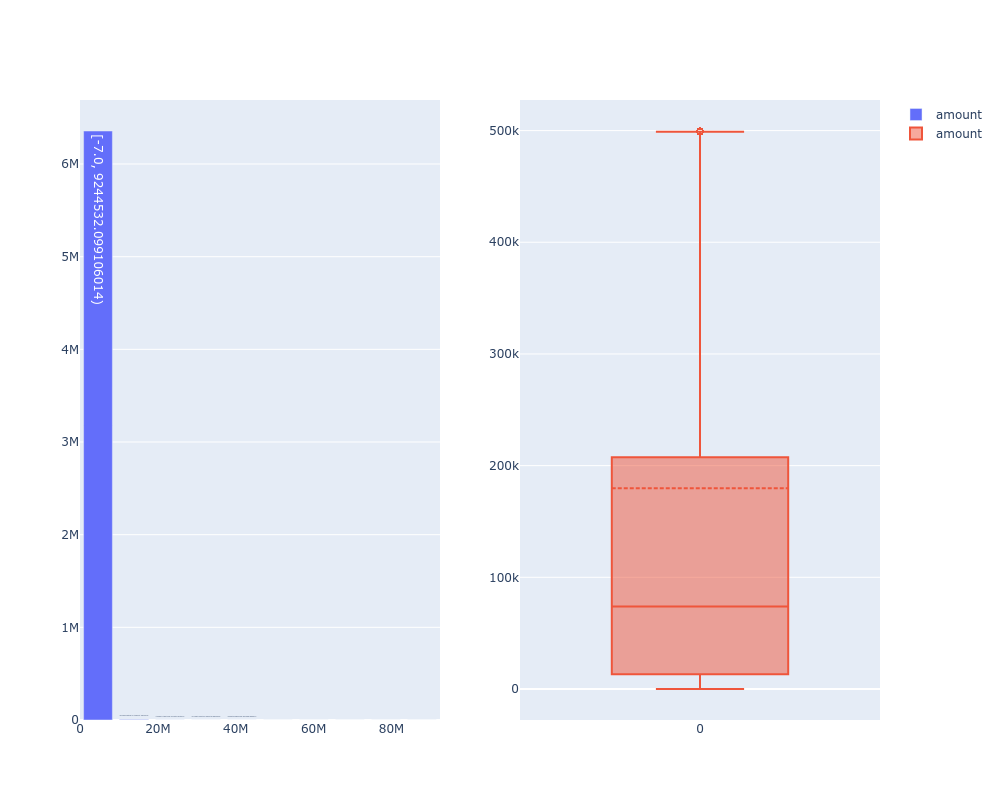

In [101]:
# ========= 
#  amount 
# =========

# calculate quantiles
q = ks_df['amount'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['amount'] < (q[0] - 1.5 * iqr) ) | ( ks_df['amount'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['amount'].skew():,.2f}.\nKurtosis is {ks_df['amount'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['amount'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['amount'].plot.box().data[0],  row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,250,083 outliers (82.51% of the total)


Skew is 5.25.
Kurtosis is 32.99.


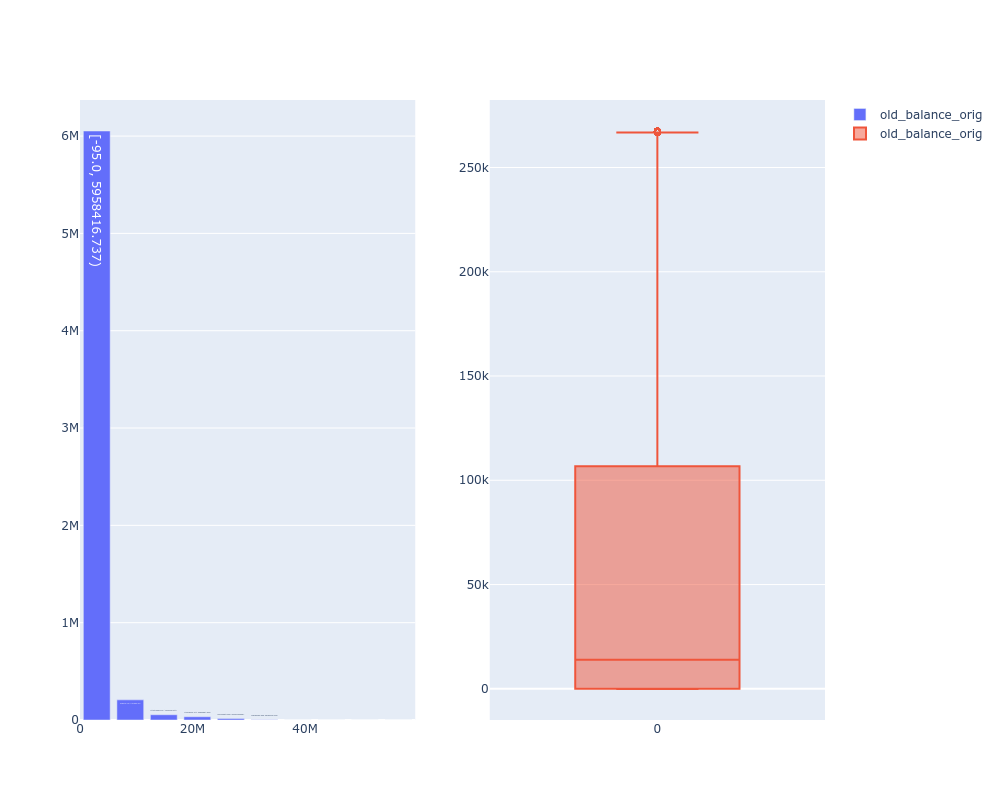

In [102]:
# =================== 
#  old_balance_orig
# ===================

# calculate quantiles
q = ks_df['old_balance_orig'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['old_balance_orig'] < (q[0] - 1.5 * iqr) ) | ( ks_df['old_balance_orig'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['old_balance_orig'].skew():,.2f}.\nKurtosis is {ks_df['old_balance_orig'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['old_balance_orig'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['old_balance_orig'].plot.box().data[0],  row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,096,120 outliers (80.09% of the total)


Skew is 5.32.
Kurtosis is 33.75.


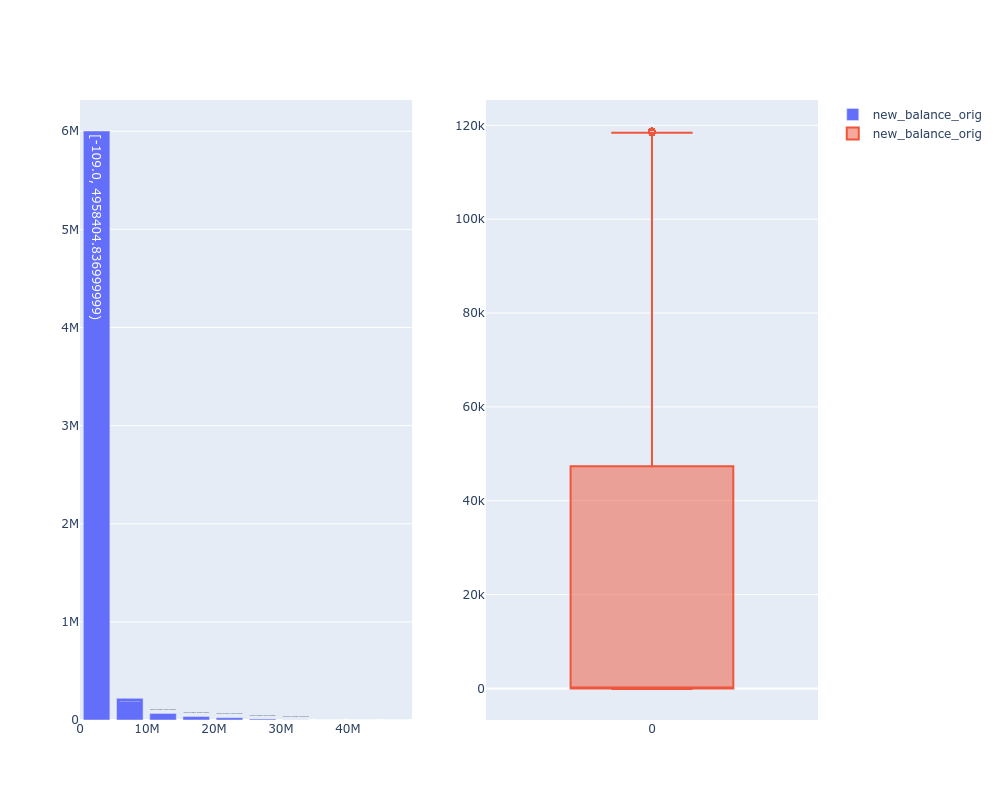

In [103]:
# =================== 
#  new_balance_orig
# ===================

# calculate quantiles
q = ks_df['new_balance_orig'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['new_balance_orig'] < (q[0] - 1.5 * iqr) ) | ( ks_df['new_balance_orig'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['new_balance_orig'].skew():,.2f}.\nKurtosis is {ks_df['new_balance_orig'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['new_balance_orig'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['new_balance_orig'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,788,128 outliers (90.97% of the total)


Skew is 32.92.
Kurtosis is 1,765.32.


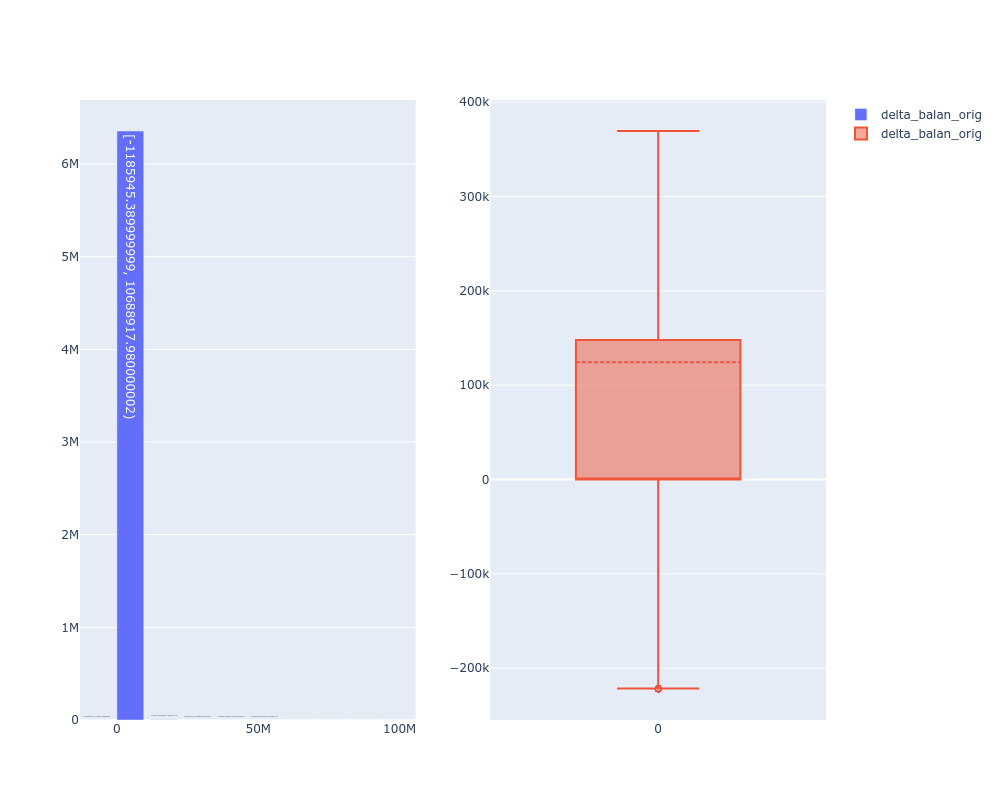

In [104]:
# =================== 
#  delta_balan_orig
# ===================

# calculate quantiles
q = ks_df['delta_balan_orig'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['delta_balan_orig'] < (q[0] - 1.5 * iqr) ) | ( ks_df['delta_balan_orig'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['delta_balan_orig'].skew():,.2f}.\nKurtosis is {ks_df['delta_balan_orig'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['delta_balan_orig'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['delta_balan_orig'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 6,362,618 outliers (100.00% of the total)


Skew is 0.01.
Kurtosis is -1.48.


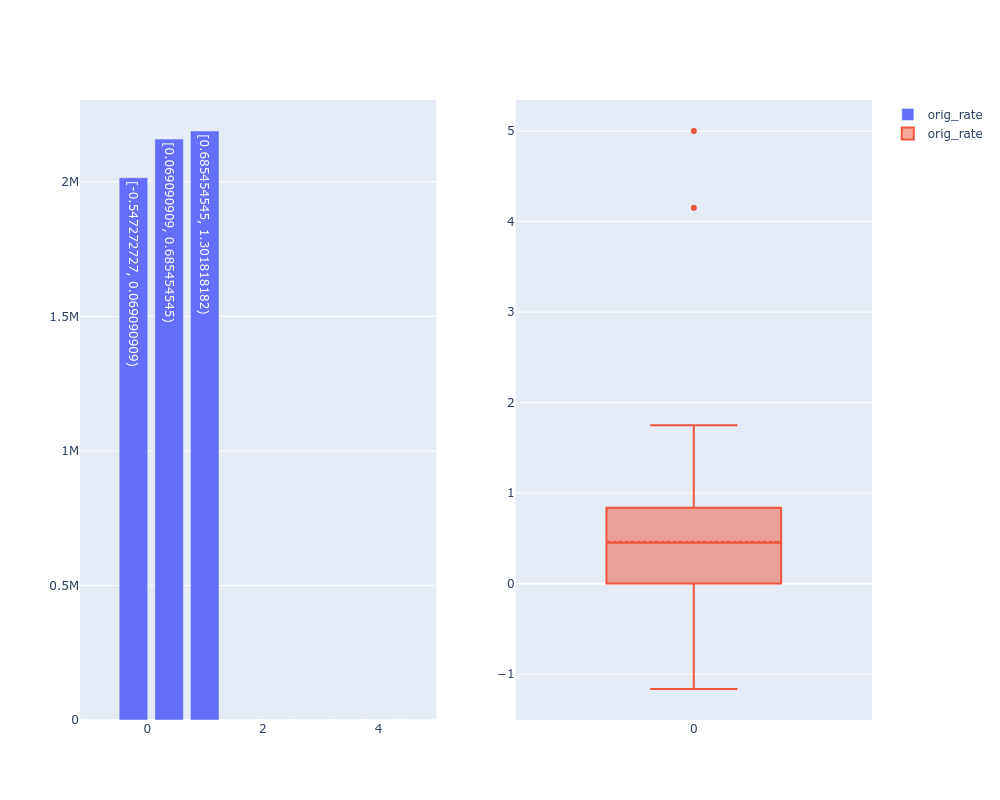

In [105]:
# =================== 
#  orig_rate
# ===================

# calculate quantiles
q = ks_df['orig_rate'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['orig_rate'] < (q[0] - 1.5 * iqr) ) | ( ks_df['orig_rate'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['orig_rate'].skew():,.2f}.\nKurtosis is {ks_df['orig_rate'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['orig_rate'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['orig_rate'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,576,341 outliers (87.64% of the total)


Skew is 19.92.
Kurtosis is 948.68.


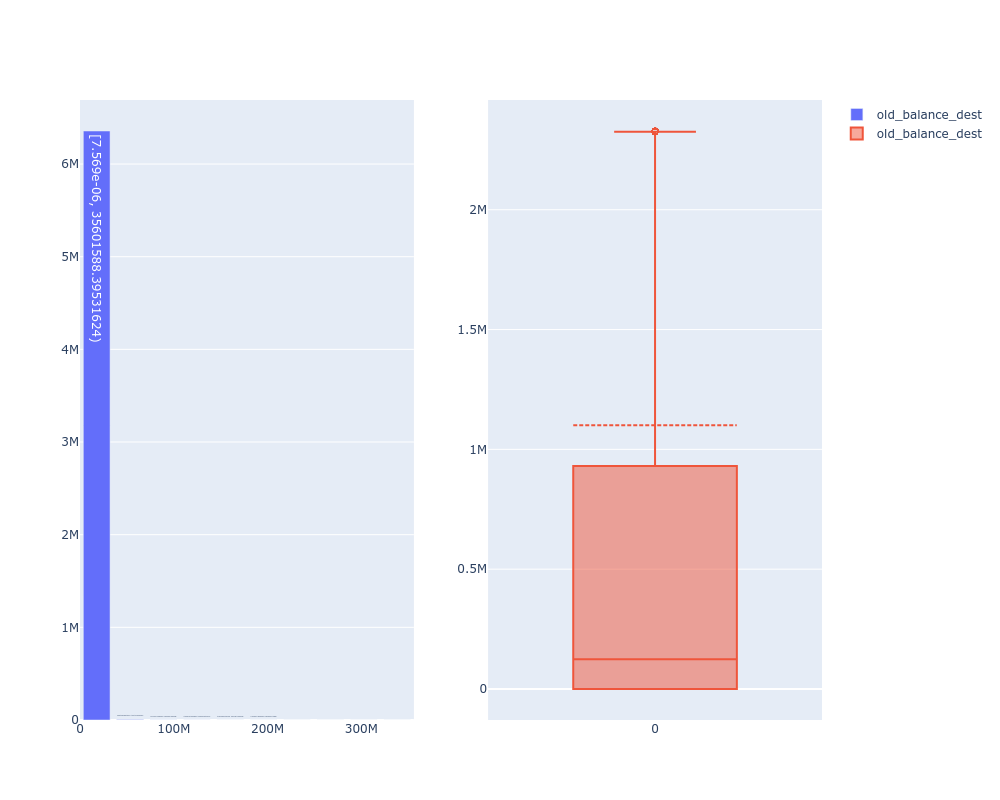

In [106]:
# =================== 
#  old_balance_dest
# ===================

# calculate quantiles
q = ks_df['old_balance_dest'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['old_balance_dest'] < (q[0] - 1.5 * iqr) ) | ( ks_df['old_balance_dest'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['old_balance_dest'].skew():,.2f}.\nKurtosis is {ks_df['old_balance_dest'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['old_balance_dest'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['old_balance_dest'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,624,058 outliers (88.39% of the total)


Skew is 19.35.
Kurtosis is 862.16.


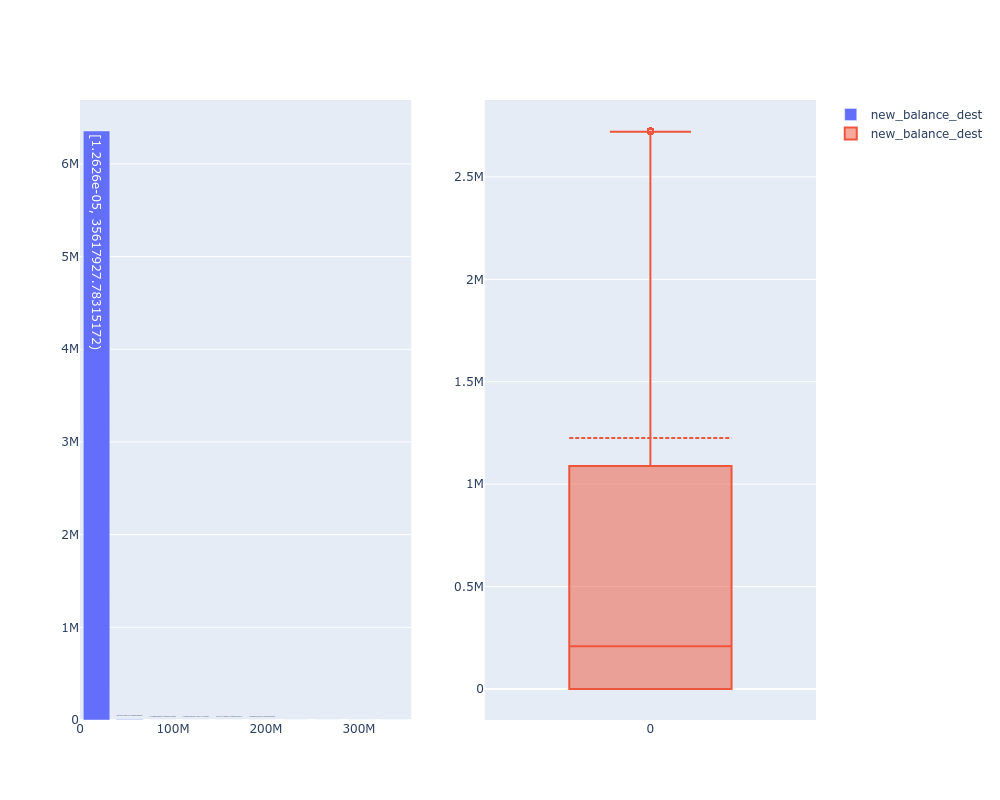

In [107]:
# =================== 
# new_balance_dest
# ===================

# calculate quantiles
q = ks_df['new_balance_dest'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['new_balance_dest'] < (q[0] - 1.5 * iqr) ) | ( ks_df['new_balance_dest'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['new_balance_dest'].skew():,.2f}.\nKurtosis is {ks_df['new_balance_dest'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['new_balance_dest'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['new_balance_dest'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,788,128 outliers (90.97% of the total)


Skew is 32.92.
Kurtosis is 1,765.32.


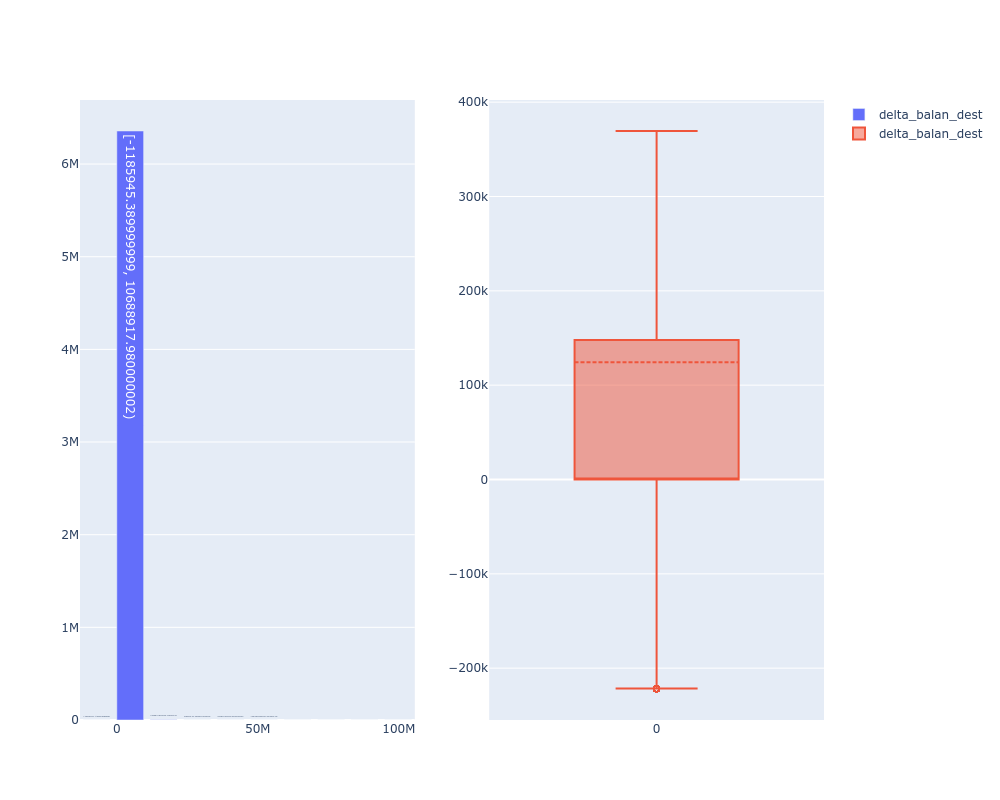

In [108]:
# =================== 
# delta_balan_dest
# ===================

# calculate quantiles
q = ks_df['delta_balan_dest'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['delta_balan_dest'] < (q[0] - 1.5 * iqr) ) | ( ks_df['delta_balan_dest'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['delta_balan_dest'].skew():,.2f}.\nKurtosis is {ks_df['delta_balan_dest'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['delta_balan_dest'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['delta_balan_dest'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

There are 5,453,715 outliers (85.71% of the total)


Skew is 168.61.
Kurtosis is 49,658.99.


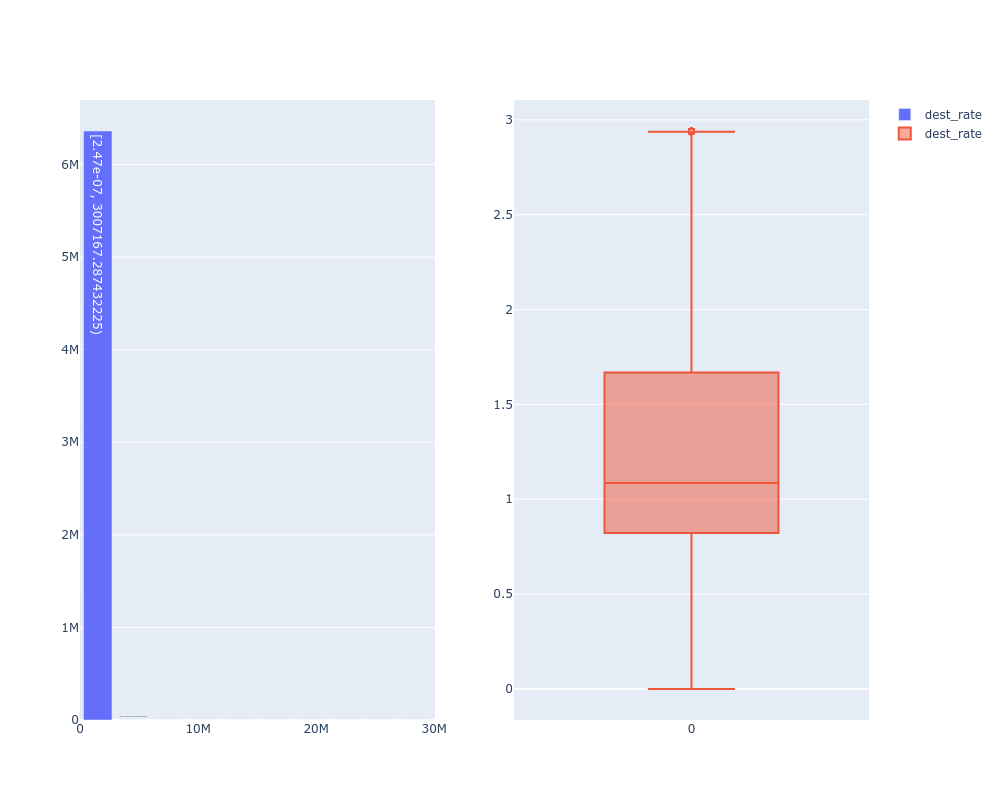

In [109]:
# =================== 
# dest_rate
# ===================

# calculate quantiles
q = ks_df['dest_rate'].quantile([.25, .75])

# calculate interquantile range
iqr = q[1] - q[0]

# get number of outliers
num_outliers = len(ks_df[ ( ks_df['dest_rate'] < (q[0] - 1.5 * iqr) ) | ( ks_df['dest_rate'] < (q[1] + 1.5 * iqr) ) ])

# get percentage of outliers
perc_outliers = ( num_outliers / len(ks_df) ) * 100

# print outliers info
print(f'There are {num_outliers:,} outliers ({perc_outliers:.2f}% of the total)')


# print skew and kurtosis
print(f"Skew is {ks_df['dest_rate'].skew():,.2f}.\nKurtosis is {ks_df['dest_rate'].kurtosis():,.2f}.")


# create figure with histogram above boxplot
fig = (make_subplots( rows = 1, cols = 2 )
       .add_trace( ks_df['dest_rate'].plot.hist().data[0], row = 1, col = 1)
       .add_trace( ks_df['dest_rate'].plot.box().data[0], row = 1, col = 2)
      )
# update figure size
fig.update_layout( autosize = False, width = 1000, height = 800 )
# show figure
fig.show('png')

# Categorical Variables

In [68]:
ks_df.columns

Index(['step', 'type', 'name_orig', 'name_dest', 'amount', 'old_balance_orig',
       'new_balance_orig', 'delta_balan_orig', 'orig_rate', 'old_balance_dest',
       'new_balance_dest', 'delta_balan_dest', 'dest_rate', 'is_flagged_fraud',
       'is_fraud'],
      dtype='object')

In [69]:
ks_df['type'].plot.bar()

In [70]:
# Number of unique name_orig variable

ks_df['name_orig'].nunique()

6353335

In [71]:
# Number of unique name_dest variable

ks_df['name_dest'].nunique()

2727854

# Bivariate Analysis

In [72]:
# dataframe filtering with only fraudulent transactions

frauds_df = ks_df[ks_df['is_fraud'] == 1 ]

In [73]:
frauds_df.shape

(8213, 15)

In [74]:
frauds_df.head()

,step,type,name_orig,name_dest,amount,old_balance_orig,new_balance_orig,delta_balan_orig,orig_rate,old_balance_dest,new_balance_dest,delta_balan_dest,dest_rate,is_flagged_fraud,is_fraud
6354407,741,CASH_OUT,161_8178_0,161_8134_0,2.00,-71.00,-73.0,213.19,1.028571,2.700696e+05,2.702828e+05,213.19,1.000789,0,1
6354408,212,CASH_OUT,161_2386_0,161_2374_0,362998.52,363050.52,52.0,364225.72,0.000146,2.159733e+06,2.523959e+06,364225.72,1.168644,0,1
6354409,568,CASH_OUT,161_6282_0,161_6251_0,66187.66,66125.66,-62.0,65578.32,-0.000922,7.177089e+05,7.832872e+05,65578.32,1.091372,0,1
6354410,15,CASH_OUT,161_168_0,161_167_0,696771.08,696771.08,0.0,982470.57,0.000001,3.688858e+05,1.351356e+06,982470.57,3.663339,0,1
6354411,501,CASH_OUT,161_5584_0,161_5556_0,73332.47,73285.47,-47.0,66959.98,-0.000628,1.253682e+05,1.923281e+05,66959.98,1.534102,0,1


## H1. What percentage of fraud cases typically result in a final origin balance of zero?

### ¬ H1 IS False? on 98% of the frauds, the final origin balance is zero.

In [75]:
# Number of frauds
frauds_num = len(frauds_df)

# print hypothesis
print(f'The number of frauds:{frauds_num:,}')

The number of frauds:8,213


In [76]:
# The number of fraud where final origin balance is zero!
# Filter new_balance_orig is 0
frauds_num_orig_zero = len( frauds_df[ frauds_df['new_balance_orig'] == 0 ] )

# print hypothesis
print(f'The number of frauds with new balance is zero:{frauds_num_orig_zero:,}')

print(f'Number of fraud where final origin balance is zero: {frauds_num_orig_zero:,} then ({(frauds_num_orig_zero / frauds_num)*100:.2f}%)')

The number of frauds with new balance is zero:43
Number of fraud where final origin balance is zero: 43 then (0.52%)



## H2. In more than 50% of fraudulent occurrences, the initial balance of the origin account is higher than 10,000?


###  ¬ H2 IS TRUE, on 96% of the frauds, the initial origin balance is more than 10,000.

In [77]:
# Number of frauds
frauds_num = len(frauds_df)

# Select those rows where old_balance_orig > 10.000
frauds_num_init_orig = len(frauds_df[frauds_df['old_balance_orig'] > 10000])

# print hypothesis
print(f'The number of frauds:{frauds_num:,}')

print(f'The number of fraud where initial origin balance is more than 10.000: {frauds_num_init_orig:,}')

print(f'Final origin balance is more than 10.000 represent: {frauds_num_init_orig:,} then ({(frauds_num_init_orig / frauds_num)*100:.2f}%)')

The number of frauds:8,213
The number of fraud where initial origin balance is more than 10.000: 7,876
Final origin balance is more than 10.000 represent: 7,876 then (95.90%)


## H3. In more than 75% of fraudulent occurrences, the transaction value is higher than 20,000?
###  ¬ H3 IS TRUE, on 94% of the frauds, the transaction amount is more than 20,000.

In [78]:
# Number of frauds
frauds_num = len(frauds_df)

# Select those rows where amont > 20.000
frauds_num_amount = len(frauds_df[frauds_df['amount'] > 20000 ])

# print hypothesis
print(f'The number of frauds:{frauds_num:,}')

print(f'The number of fraud where transations value is higher than 20.000: {frauds_num_amount:,}')

print(f'Transations value with amount higher than 20.000 represent: {frauds_num_amount:,} then ({(frauds_num_amount / frauds_num)*100:.2f}%)')

The number of frauds:8,213
The number of fraud where transations value is higher than 20.000: 7,719
Transations value with amount higher than 20.000 represent: 7,719 then (93.99%)


## H4. The "Transfer" type of transaction represents more than 50% of all frauds?
### ¬ H4 IS FALSE, on 49% of the frauds, the type of transaction is TRANSFER.

In [79]:
# calculate number of frauds per type
ks_df['type'].value_counts(normalize=True)

# from the dataset go to filter is_fraud == 1
frauds_df = ks_df[ks_df['is_fraud'] == 1 ]

# Count TRANSFER type
transfer_count = frauds_df['type'].value_counts(normalize=True)
transfer_count


# +++++++++++++++++++Insights+++++++++++++++++++++
# Fraud is hapen only (CASH_OUT, and TRANSFER).
# ++++++++++++++++++++++++++++++++++++++++++++++++

CASH_OUT    0.500913
TRANSFER    0.499087
Name: type, dtype: float64

In [80]:
frauds_df['type'].plot.bar()

In [81]:
# calculate number of frauds per type
type_frauds_df = frauds_df.groupby('type').agg( count_frauds = pd.NamedAgg(column = 'is_fraud', aggfunc = 'count') )

type_frauds_df

,count_frauds
type,
TRANSFER,4099
CASH_OUT,4114


In [82]:
# calculate number of frauds
frauds_num = len( frauds_df )

# calculate number of frauds of TRANFER type
transfer_count = type_frauds_df.loc['TRANSFER'].values[0]

# print hypothesis
print( f"The number of frauds: {frauds_num:,}" )
print( f"Number of fraud where type is equal to TRANSFER: {transfer_count:,} ({(transfer_count / frauds_num) * 100:.2f}%)" )

The number of frauds: 8,213
Number of fraud where type is equal to TRANSFER: 4,099 (49.91%)


## H5. In more than 80% of fraudulent occurrences, the initial balance of the destination account is zero?
### ¬ H5 IS FALSE, on 0% of the frauds, the initial destination balance is zero.

In [83]:
# calculate number of frauds
frauds_num = len( frauds_df )

# calculate the number of fraud where initial destination balance is zero
frauds_num_dest_zero = len( frauds_df[frauds_df['old_balance_dest'] == 0 ] )

#print hypothesis
print( f"The number of frauds: {frauds_num:,}" )
print( f"Number of fraud where initial balance of destination is zero: {frauds_num_dest_zero:,} ({(frauds_num_dest_zero / frauds_num) * 100:.2f}%)" )

The number of frauds: 8,213
Number of fraud where initial balance of destination is zero: 0 (0.00%)


## H6. There is no origin account with more than 10 frauds?

### ¬ H6 IS TRUE, there is no origin associated with more than one fraud.

In [84]:
# count number of frauds per origin
count_orig_df = frauds_df.groupby('name_dest').agg( count_frauds= pd.NamedAgg(column='is_fraud',aggfunc='count'))
count_orig_df

,count_frauds
name_dest,
161_510_0,1
161_3217_0,1
161_6238_0,1
161_5951_0,1
161_4441_0,1
161_2157_0,1
161_7209_0,1
161_568_0,1
161_684_0,1


## H7. There is at least one destination account with more than 20 frauds?
### ¬ H7 IS TRUE, there is no destination associated with more than two frauds.

In [85]:
# count number of frauds per destination
count_dest_df = frauds_df.groupby('name_dest').agg( count_frauds= pd.NamedAgg(column='is_fraud',aggfunc='count'))
count_dest_df

,count_frauds
name_dest,
161_510_0,1
161_3217_0,1
161_6238_0,1
161_5951_0,1
161_4441_0,1
161_2157_0,1
161_7209_0,1
161_568_0,1
161_684_0,1


# Multivariate Analysis

/home/ehgeraldo/.local/lib/python3.10/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

`to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.



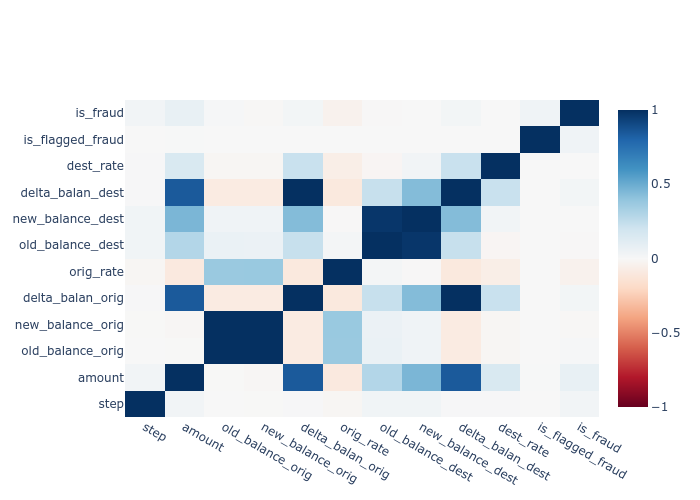

In [98]:
# get pearson correlations between columns
corr_matrix = ks_df.corr('pearson')

# plot heatmap of correlation coefficients
fig = go.Figure( data = go.Heatmap(z = corr_matrix.to_numpy(),x = corr_matrix.columns,y = corr_matrix.columns, zmin = -1,
                                   zmax = 1,colorscale = px.colors.diverging.RdBu ) )
fig.show('png')

# DATA PREPARATION

In [88]:
# dataframe previous section

prep_df = eda_df.alias('prep_df')

In [89]:
# check up

prep_df.show()

+----+--------+-------------+-------------+------------------+-------------------+------------------+----------------+--------------------+--------------------+--------------------+----------------+-------------------+----------------+--------+
|step|    type|    name_orig|    name_dest|            amount|   old_balance_orig|  new_balance_orig|delta_balan_orig|           orig_rate|    old_balance_dest|    new_balance_dest|delta_balan_dest|          dest_rate|is_flagged_fraud|is_fraud|
+----+--------+-------------+-------------+------------------+-------------------+------------------+----------------+--------------------+--------------------+--------------------+----------------+-------------------+----------------+--------+
| 211|CASH_OUT|160_2696646_0| 160_901564_0|184185.75527735116| 203108.47605069657|18922.720773345412|       184133.43| 0.09317005361493823|  1019993.7073250777|   1204127.136276725|       184133.43| 1.1805239062803912|               0|       0|
| 394|CASH_OUT|160_5

## Select dataframe to training and test

In [91]:
# split data into training (75%), validation (15%) and testing (10%) data

first_split = prep_df.randomSplit(weights = [0.9, 0.1], seed = 10)

second_split = first_split[0].randomSplit(weights = [0.83, 0.17], seed = 10)

# final dataframes

training_df = second_split[0]
test_df = first_split[1]
validation_df = second_split[1]

In [97]:
# how is the number of frauds before splitting ?
total_num_frauds = prep_df.filter( prep_df['is_fraud']  == 1 ).count()
print(f"Total number of frauds: {total_num_frauds}")

# how is the number of frauds on training data ?
total_training_frauds = training_df.filter(training_df['is_fraud'] == 1 ).count()
print(f"Number of frauds in training dataset:{total_training_frauds}")

# how is the number of frauds on test data ?
total_testing_frauds = test_df.filter( test_df['is_fraud']  == 1 ).count()
print(f"Number of frauds in testing dataset: {total_testing_frauds}")

# how is the number of frauds on validation data ? 
total_validation_frauds = validation_df.filter(validation_df['is_fraud'] == 1 ).count()
print(f"Number of frauds in validation dataset:{total_validation_frauds}")

# check splitting
assert total_num_frauds == total_training_frauds + total_testing_frauds + total_validation_frauds, 'Splitting error, check it !!!'


# check frauds proportion on datasets -> must be similar to 10-15-75 %
print(f"\nFraud testing proportion:    { int( (total_testing_frauds / total_num_frauds)    * 100) }%",
      f"\nFraud validating proportion: { int( (total_validation_frauds / total_num_frauds) * 100) }%",
      f"\nFraud training proportion:   { int( (total_training_frauds / total_num_frauds)   * 100) }%"
     )

Total number of frauds: 8213


Number of frauds in training dataset:6120


Number of frauds in testing dataset: 799


Number of frauds in validation dataset:1294

Fraud testing proportion:    9% 
Fraud validating proportion: 15% 
Fraud training proportion:   74%
